In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [4]:
#load the dataset
data="IPG2211A2N.csv"

In [6]:
df=pd.read_csv(data)

In [9]:
#1.checking missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 observation_date    0
IPG2211A2N          0
dtype: int64


In [10]:
#2.print dtypes of data
print("\nData types before conversion:\n", df.dtypes)


Data types before conversion:
 observation_date     object
IPG2211A2N          float64
dtype: object


In [11]:
# 3. Convert the first column to datetime and rename the second column
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.rename(columns={'IPG2211A2N': 'Production of electric utilities'}, inplace=True)

In [12]:
print("\nData types after conversion:\n", df.dtypes)


Data types after conversion:
 observation_date                    datetime64[ns]
Production of electric utilities           float64
dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


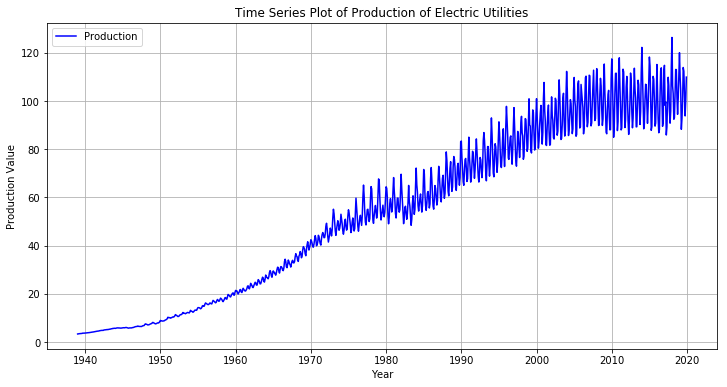

In [13]:
# 4. Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['observation_date'], df['Production of electric utilities'], color='blue', label="Production")
plt.xlabel("Year")
plt.ylabel("Production Value")
plt.title("Time Series Plot of Production of Electric Utilities")
plt.legend()
plt.grid(True)
plt.show()

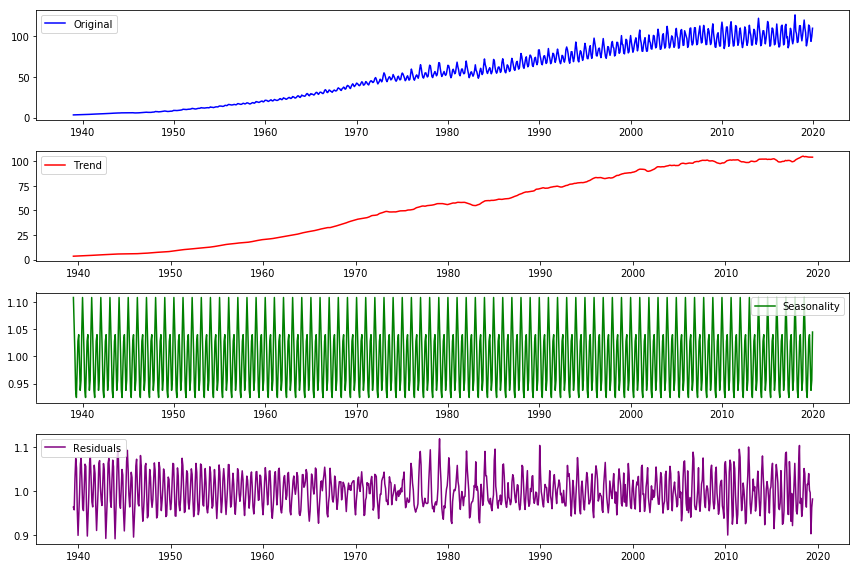

In [18]:
# 5. Decompose the time series model
decomposition = seasonal_decompose(df['Production of electric utilities'], freq=12, model='multiplicative')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['observation_date'], df['Production of electric utilities'], label='Original', color='blue')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df['observation_date'], decomposition.trend, label='Trend', color='red')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df['observation_date'], decomposition.seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df['observation_date'], decomposition.resid, label='Residuals', color='purple')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# 6. Calculate mean and variance for t
mean_value = np.mean(df['Production of electric utilities'])
variance_value = np.var(df['Production of electric utilities'])

# Calculate mean and variance for t+1
mean_t1 = np.mean(df['Production of electric utilities'].shift(-1))
variance_t1 = np.var(df['Production of electric utilities'].shift(-1))

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
# Check if data is stationary using Augmented Dickey-Fuller test
adf_test = adfuller(df['Production of electric utilities'])
adf_statistic, adf_p_value = adf_test[0], adf_test[1]

print("\nMean:", mean_value)
print("Variance:", variance_value)
print("\nMean (t+1):", mean_t1)
print("Variance (t+1):", variance_t1)
print("\nADF Test Statistic:", adf_statistic)
print("ADF p-value:", adf_p_value)
if adf_p_value < 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary.")


Mean: 54.00322592592594
Variance: 1223.2396110537113

Mean (t+1): 54.05540885684863
Variance (t+1): 1221.852571434753

ADF Test Statistic: -0.3399194400664068
ADF p-value: 0.9196571716060372
The data is non-stationary.


In [23]:
# 7. Calculate the autocovariance for lag (t+1)
lag_1_series = df['Production of electric utilities'].shift(1)
autocovariance_t1 = np.mean((df['Production of electric utilities'] - mean_value) * (lag_1_series - mean_value))

In [25]:
# 8. Calculate the autocorrelation for lag (t+1)
autocorrelation_t1 = df['Production of electric utilities'].autocorr(lag=1)
print("\nAutocovariance (t+1):", autocovariance_t1)
print("Autocorrelation (t+1):", autocorrelation_t1)


Autocovariance (t+1): 1206.9561496409324
Autocorrelation (t+1): 0.9880442327544836


<Figure size 576x360 with 0 Axes>

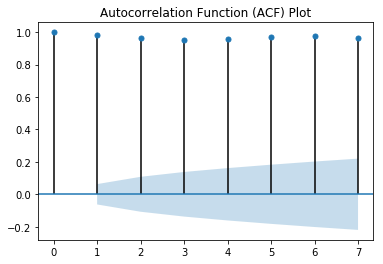

In [29]:
# 9. Create an ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(8, 5))
plot_acf(df['Production of electric utilities'], lags=len(data)//2)
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()